In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
from tensorflow.keras.datasets import fashion_mnist
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()
xtrain.shape

(60000, 28, 28)

In [23]:
xtrain = xtrain.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0

In [24]:
xtrain = xtrain.reshape(-1,28,28,1)

In [25]:
xtrain.shape

(60000, 28, 28, 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [30]:
def create_model():
    model = Sequential([
        layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),
    
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),
    
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    return model

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', patience=3)

In [35]:
cnn = create_model()
cnn.summary()
hist = cnn.fit(
    xtrain,ytrain,
    epochs=3,
    batch_size=64,
    validation_data=(xtest,ytest),
    callbacks = [earlystop]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 52ms/step - accuracy: 0.7882 - loss: 0.6014 - val_accuracy: 0.8673 - val_loss: 0.3433
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.8854 - loss: 0.3121 - val_accuracy: 0.8890 - val_loss: 0.3147
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9003 - loss: 0.2674 - val_accuracy: 0.8960 - val_loss: 0.2796


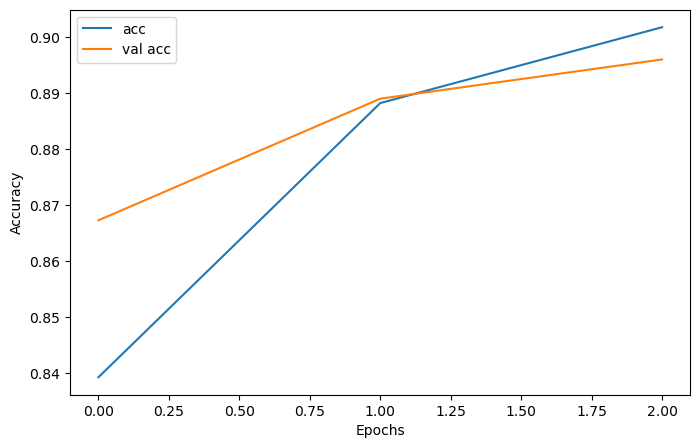

In [38]:
plt.figure(figsize=(8,5))
plt.plot(hist.history['accuracy'], label="acc")
plt.plot(hist.history['val_accuracy'], label="val acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
test_loss, test_accuracy = cnn.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8967 - loss: 0.2840


In [41]:
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.8960
Test loss: 0.2796


In [49]:
ypred_prob = cnn.predict(xtest)
ypred = np.argmax(ypred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[785   1  19  41  10   1 139   0   4   0]
 [  0 977   0  18   1   0   3   0   1   0]
 [ 15   0 817  16 106   0  46   0   0   0]
 [  6   4   7 919  36   0  27   0   1   0]
 [  0   1  19  24 915   0  41   0   0   0]
 [  0   0   0   1   0 986   0  10   1   2]
 [ 78   0  76  44 107   0 692   0   3   0]
 [  0   0   0   0   0  15   0 973   1  11]
 [  6   4   6   3   6   1  13   1 960   0]
 [  0   0   0   0   0   7   0  57   0 936]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.82      0.84      1000
           3       0.86      0.92      0.89      1000
           4       0.77      0.92      0.84      1000
           5       0.98      0.99      0.98      1000
           6       0.72      0.69      0.71      1000
           7       0.93      0.97      0.95      1000
           8       0.99      0.96      0.97      1000
           9       0.99     